In [58]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import pandas_ta as ta






In [59]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [60]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [61]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [62]:



df = getQuotes(frameM30, 2023, 10)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1696204800,1.05683,1.05693,1.05675,1.05675,147,39,0
1,1696206600,1.05675,1.05675,1.05630,1.05659,297,39,0
2,1696208400,1.05661,1.05691,1.05607,1.05633,7590,9,0
3,1696210200,1.05634,1.05638,1.05574,1.05588,1008,9,0
4,1696212000,1.05589,1.05612,1.05574,1.05607,781,9,0
...,...,...,...,...,...,...,...,...
475,1697232600,1.05078,1.05119,1.05047,1.05107,2348,9,0
476,1697234400,1.05107,1.05137,1.05089,1.05108,2079,9,0
477,1697236200,1.05108,1.05154,1.05103,1.05134,1835,9,0
478,1697238000,1.05134,1.05135,1.05074,1.05081,782,9,0


In [63]:


def macd(df, shortEmaPeriod, longEmaPeriod, signalEmaPeriod):
    df[f'ema-{shortEmaPeriod}'] = ta.ema(df['close'], length=shortEmaPeriod)
    df[f'ema-{longEmaPeriod}'] = ta.ema(df['close'], length=longEmaPeriod)
    df['MACD_LINE'] = df[f'ema-{shortEmaPeriod}'] - df[f'ema-{longEmaPeriod}']
    df['MACD_SIGNAL'] = ta.ema(df['MACD_LINE'], signalEmaPeriod)
    df['MACD_OSC'] = df['MACD_LINE'] - df['MACD_SIGNAL']
    return df

def ema(df, lookBackPeriod=20):
    df['EMA'] = ta.ema(df['close'], length=lookBackPeriod)
    return df


In [64]:

emaLookBack=13

# macd
shortEma=12
longEma=26
signalEma=9


df = ema(df, emaLookBack)
df = macd(df, shortEma, longEma, signalEma)

df = df.dropna()

df

,time,open,high,low,close,tick_volume,spread,real_volume,EMA,ema-12,ema-26,MACD_LINE,MACD_SIGNAL,MACD_OSC
25,1696249800,1.05477,1.05484,1.05345,1.05388,2956,9,0,1.056249,1.056207,1.056581,-0.000373,-0.000373,0.000000
26,1696251600,1.05387,1.05408,1.05351,1.05357,2608,9,0,1.055866,1.055802,1.056358,-0.000556,-0.000410,-0.000146
27,1696253400,1.05356,1.05434,1.05334,1.05391,2010,9,0,1.055587,1.055511,1.056176,-0.000666,-0.000461,-0.000205
28,1696255200,1.05391,1.05397,1.05311,1.05351,2314,9,0,1.055290,1.055203,1.055979,-0.000776,-0.000524,-0.000252
29,1696257000,1.05352,1.05421,1.05299,1.05309,2721,9,0,1.054976,1.054878,1.055765,-0.000887,-0.000597,-0.000290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,1697232600,1.05078,1.05119,1.05047,1.05107,2348,9,0,1.051206,1.051139,1.052045,-0.000906,-0.000920,0.000014
476,1697234400,1.05107,1.05137,1.05089,1.05108,2079,9,0,1.051188,1.051130,1.051973,-0.000844,-0.000905,0.000061
477,1697236200,1.05108,1.05154,1.05103,1.05134,1835,9,0,1.051210,1.051162,1.051927,-0.000764,-0.000877,0.000112
478,1697238000,1.05134,1.05135,1.05074,1.05081,782,9,0,1.051153,1.051108,1.051844,-0.000736,-0.000848,0.000112


In [65]:


def ohlcPlot(df):
    plt.figure(figsize=(14, 6))
    for i in range(len(df)):
        plt.vlines(x=i, ymin=df.iloc[i]['low'], ymax=df.iloc[i]['high'], color='black', linewidth=1)
        if (df.iloc[i]['close'] > df.iloc[i]['EMA']) and (df.iloc[i]['MACD_LINE'] > 0):
            plt.vlines(x=i, ymin=df.iloc[i]['open'], ymax=df.iloc[i]['close'], color='green', linewidth=3)
        if (df.iloc[i]['close'] < df.iloc[i]['EMA']) and (df.iloc[i]['MACD_LINE'] < 0):
            plt.vlines(x=i, ymin=df.iloc[i]['close'], ymax=df.iloc[i]['open'], color='red', linewidth=3)
        if (df.iloc[i]['close'] < df.iloc[i]['EMA']) and (df.iloc[i]['MACD_LINE'] > 0):
            plt.vlines(x=i, ymin=df.iloc[i]['close'], ymax=df.iloc[i]['open'] + 0.00001, color='black', linewidth=3)
        if (df.iloc[i]['close'] > df.iloc[i]['EMA']) and (df.iloc[i]['MACD_LINE'] < 0):
            plt.vlines(x=i, ymin=df.iloc[i]['close'], ymax=df.iloc[i]['open'] + 0.00001, color='black', linewidth=3)
    plt.grid()
    plt.show()


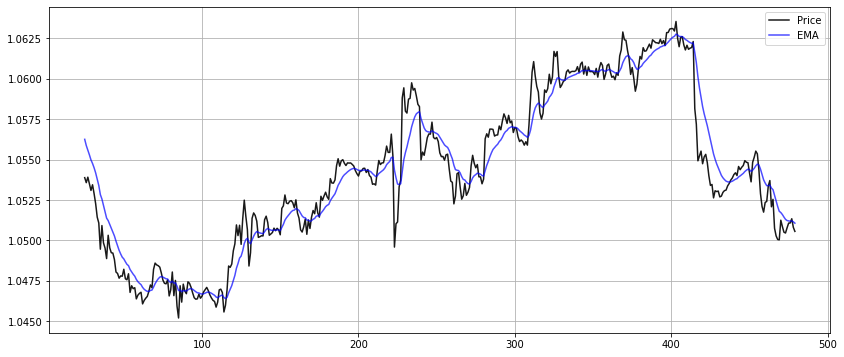

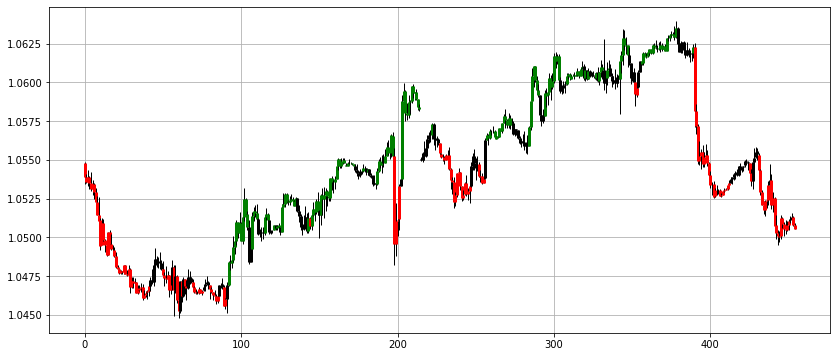

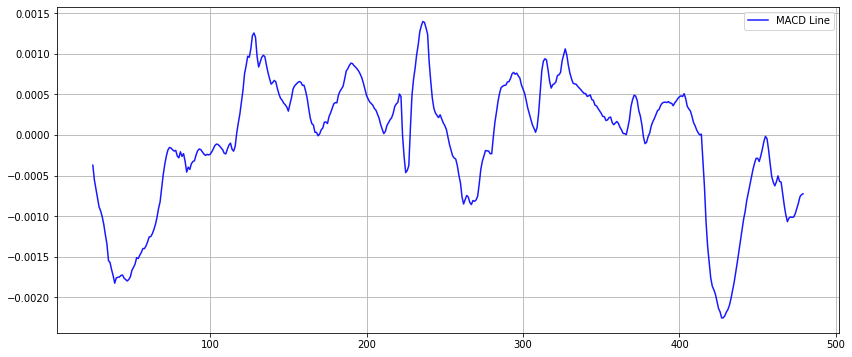

In [66]:


plt.figure(figsize=(14, 6))
plt.plot(df['close'], label='Price', color='black', alpha=0.9)
plt.plot(df['EMA'], label='EMA', color='blue', alpha=0.7)
plt.legend()
plt.grid(True)
plt.show()

ohlcPlot(df)


plt.figure(figsize=(14, 6))
plt.plot(df['MACD_LINE'], label='MACD Line', color='blue', alpha=0.9)
plt.legend()
plt.grid(True)
plt.show()

